
=== Dataset Loaded Successfully ===


=== Dataset Overview (First 5 Rows) ===
  timestamp                     post_content  likes  shares  comments  \
0   01:44.6  Sample post content 0 #hashtag0    102      61        83   
1   01:44.6  Sample post content 1 #hashtag1    435      99        29   
2   01:44.6  Sample post content 2 #hashtag2    348      13       189   
3   01:44.6  Sample post content 3 #hashtag3    270      94        74   
4   01:44.6  Sample post content 4 #hashtag4    106      47       127   

  post_type  
0      Text  
1      Text  
2     Video  
3     Image  
4     Image  

=== Missing Values ===
timestamp       0
post_content    0
likes           0
shares          0
comments        0
post_type       0
dtype: int64

=== Summary Statistics ===
                           timestamp       likes      shares    comments
count                            100  100.000000  100.000000  100.000000
mean   2025-04-22 01:44:35.999999488  252.700000   48.150000  117.820000
min   

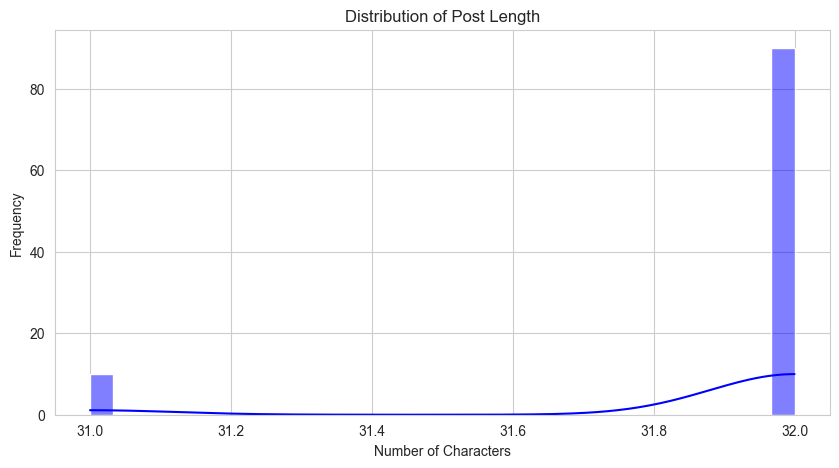

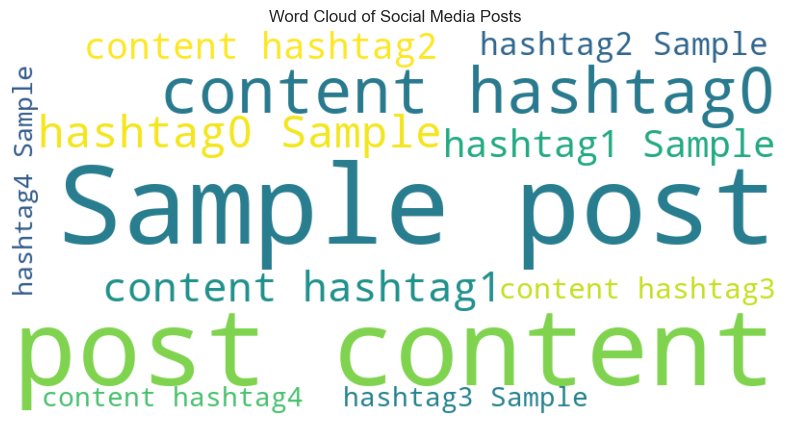

C:\Users\hp\AppData\Local\Temp\ipykernel_10708\2362169732.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Word", data=common_words, palette="magma")


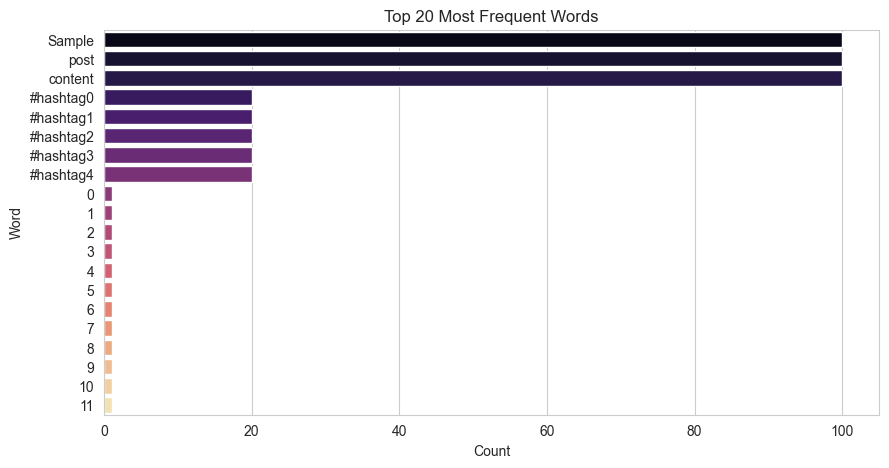

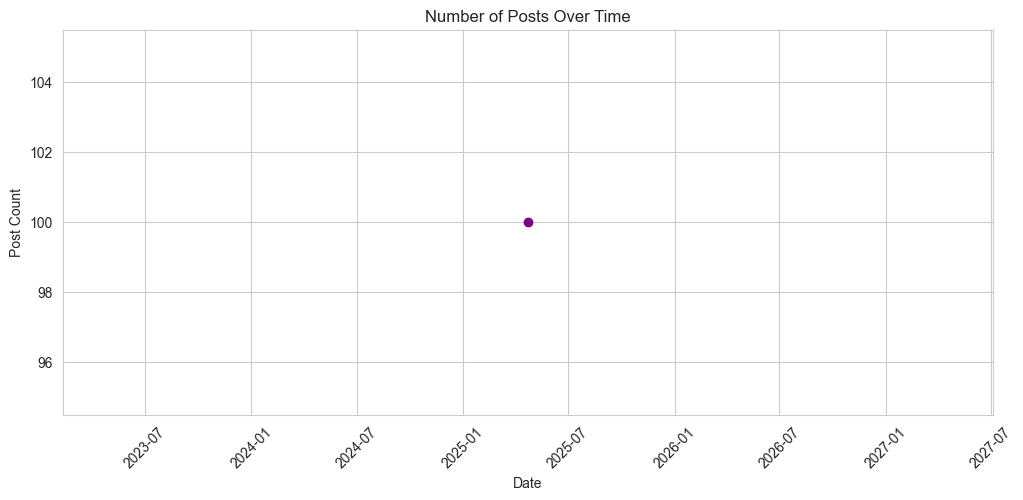

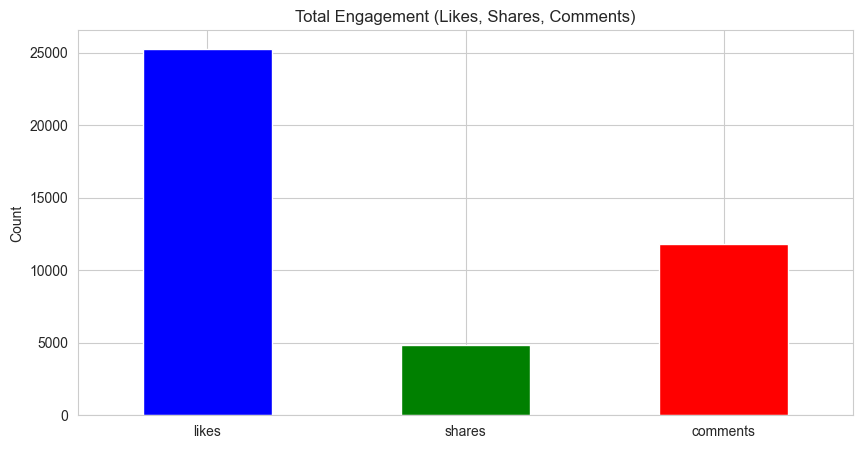

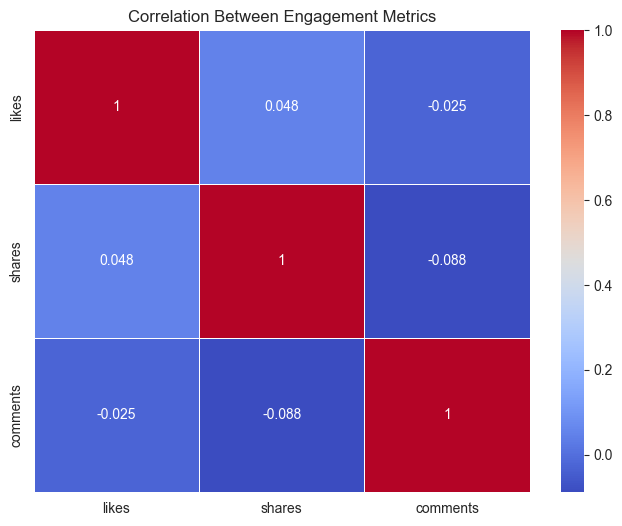

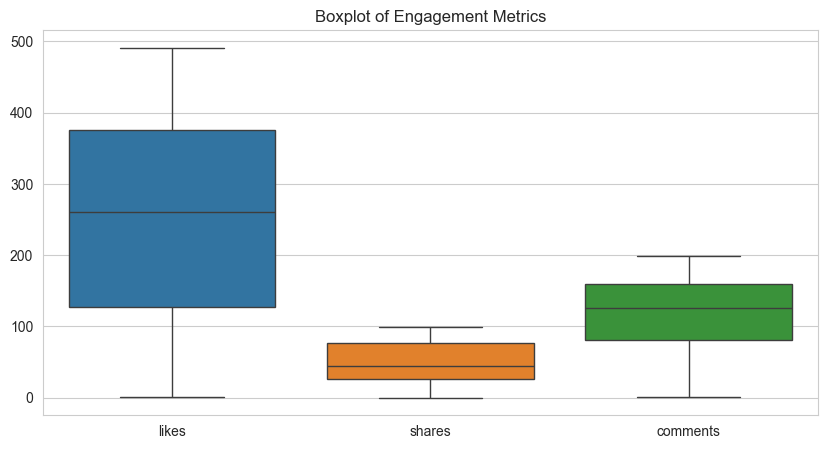

C:\Users\hp\AppData\Local\Temp\ipykernel_10708\2362169732.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Hashtag", data=common_hashtags, palette="coolwarm")


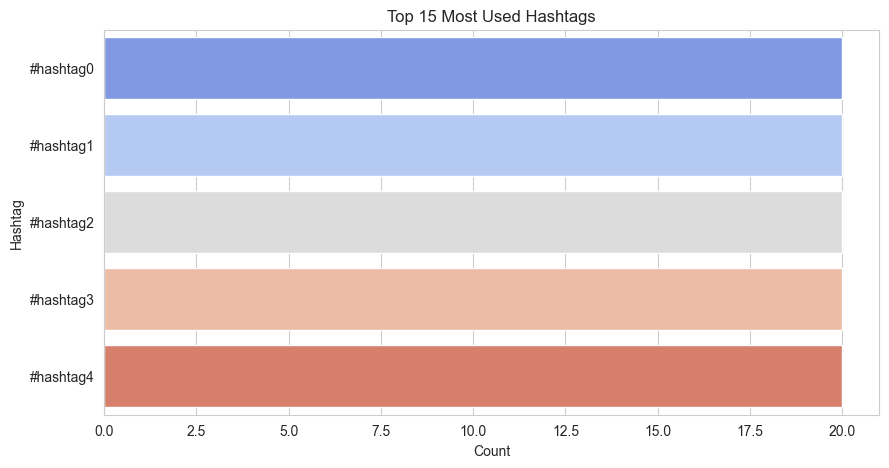

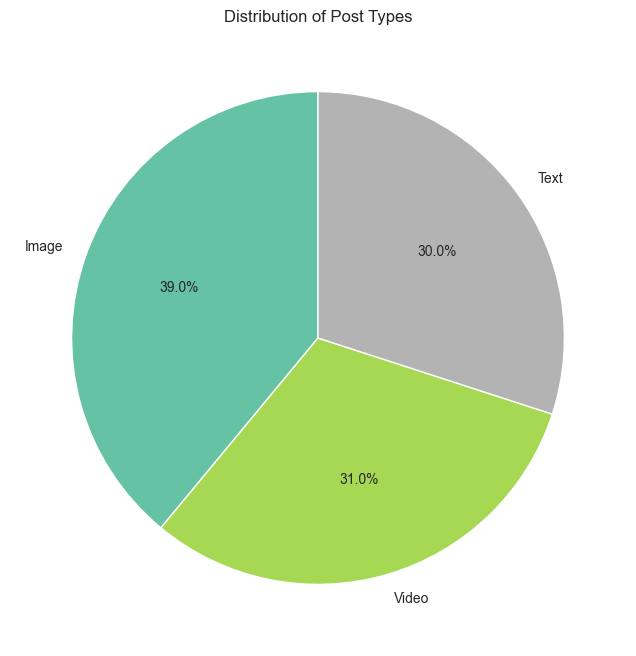


=== EDA and Visualization Completed Successfully! ===



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Configure visualization styles
sns.set_style("whitegrid")

# File path
file_path = './instagram_data.csv'
# file_path = r"C:\Users\hp\Desktop\BaveshSma\instagram_data.csv"

try:
    # Load the dataset
    df = pd.read_csv(file_path)
    print("\n=== Dataset Loaded Successfully ===\n")

    # Display first few rows
    print("\n=== Dataset Overview (First 5 Rows) ===")
    print(df.head())

    # Convert timestamp column to datetime format
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

    # Check for missing values
    print("\n=== Missing Values ===")
    print(df.isnull().sum())

    # Fill missing values with appropriate defaults
    df.fillna({"post_content": "Unknown", "likes": 0, "shares": 0, "comments": 0}, inplace=True)

    # Summary statistics
    print("\n=== Summary Statistics ===")
    print(df.describe())

    # 1. Distribution of post length
    df["post_length"] = df["post_content"].astype(str).apply(len)
    plt.figure(figsize=(10, 5))
    sns.histplot(df["post_length"], bins=30, kde=True, color="blue")
    plt.title("Distribution of Post Length")
    plt.xlabel("Number of Characters")
    plt.ylabel("Frequency")
    plt.show()

    # 2. Word Cloud for most common words
    text = " ".join(df["post_content"].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Social Media Posts")
    plt.show()

    # 3. Most frequently used words
    words = text.split()
    word_counts = Counter(words)
    common_words = pd.DataFrame(word_counts.most_common(20), columns=["Word", "Count"])
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Count", y="Word", data=common_words, palette="magma")
    plt.title("Top 20 Most Frequent Words")
    plt.show()

    # 4. Posts over time
    df["date"] = df["timestamp"].dt.date
    posts_per_day = df.groupby("date").size()
    plt.figure(figsize=(12, 5))
    posts_per_day.plot(marker="o", color="purple", linestyle="-")
    plt.title("Number of Posts Over Time")
    plt.xlabel("Date")
    plt.ylabel("Post Count")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # 5. Engagement analysis (likes, shares, comments)
    plt.figure(figsize=(10, 5))
    df[["likes", "shares", "comments"]].sum().plot(kind="bar", color=["blue", "green", "red"])
    plt.title("Total Engagement (Likes, Shares, Comments)")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

    # 6. Correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[["likes", "shares", "comments"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Between Engagement Metrics")
    plt.show()

    # 7. Boxplot of engagement metrics
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[["likes", "shares", "comments"]])
    plt.title("Boxplot of Engagement Metrics")
    plt.show()

    # 8. Hashtag analysis
    df["hashtags"] = df["post_content"].str.findall(r"#\w+")
    hashtag_list = [tag for tags in df["hashtags"] for tag in tags]
    hashtag_counts = Counter(hashtag_list)
    common_hashtags = pd.DataFrame(hashtag_counts.most_common(15), columns=["Hashtag", "Count"])

    if not common_hashtags.empty:
        plt.figure(figsize=(10, 5))
        sns.barplot(x="Count", y="Hashtag", data=common_hashtags, palette="coolwarm")
        plt.title("Top 15 Most Used Hashtags")
        plt.show()
    else:
        print("\nNo hashtags found in the dataset.")

    # 9. Pie chart of post types
    plt.figure(figsize=(8, 8))
    df["post_type"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set2")
    plt.title("Distribution of Post Types")
    plt.ylabel("")
    plt.show()

    print("\n=== EDA and Visualization Completed Successfully! ===\n")

except Exception as e:
    print(f"An error occurred: {e}")
